[  0.           0.         150.         259.80762114]


<IPython.core.display.Javascript object>


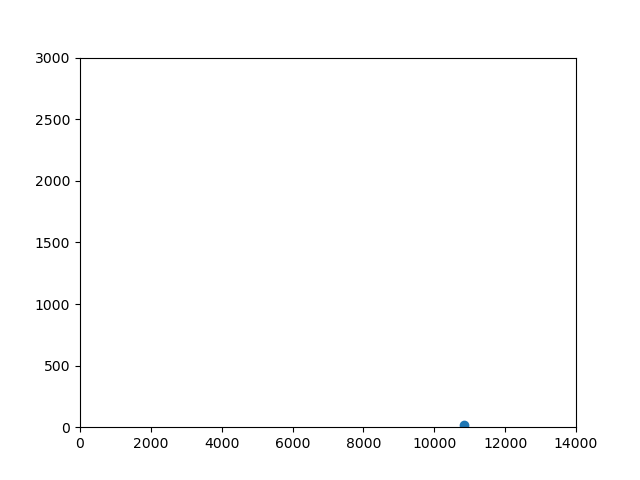

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

%matplotlib notebook

def yprime(state,t,k):
   g=9.8
   n=len(state)
   yp=np.zeros(n)
   yp[0]=state[2]       # vx, i.e. dx/dt
   yp[1]=state[3]       # vy, i.e. dy/dt
   yp[2]=-k*state[2]    # ax, i.e. dvx/dt
   yp[3]=-g-k*state[3]  # ay, i.e. dvy/dt 
   return yp

def Euler(y0,t,kconstant):
   n=len(t)
   m=len(y0)
   ytemp=np.zeros((n,m),dtype=float)   # n row, m column
   ytemp[0,:]=y0   # copy the initial value to the first row.

   i=0
   while i < (n-2):
      tx=t[i]
      dt=t[i+1]-t[i]
      yp=yprime(ytemp[i,:],tx,kconstant)
      ytemp[i+1,0]=ytemp[i,0]+yp[0]*dt     # update x
      ytemp[i+1,1]=ytemp[i,1]+yp[1]*dt     # update y
      ytemp[i+1,2]=ytemp[i,2]+yp[2]*dt     # update vx
      ytemp[i+1,3]=ytemp[i,3]+yp[3]*dt     # update vy
      i=i+1
      if ytemp[i,1] < 0.0:                       # y coordinate negative
         ytemp[i,3]=np.absolute(ytemp[i,3])  # force vy to be positive
   yval=ytemp[0:i,:]
   return yval


#  my program starts here...
dt = 0.01
tmax = 200.0
t  = np.arange(0.0,tmax,dt)

v0=300.0
theta=60.0*np.pi/180.0

# set initial state in 1D array...
stateInit=np.zeros(4)
stateInit[0]=0.0    #  x
stateInit[1]=0.0    #  y
stateInit[2]=v0*np.cos(theta)  # vx
stateInit[3]=v0*np.sin(theta)  # vy
print(stateInit)

kconstant=0.01   #  k-constnt (air registance)
stateA=Euler(stateInit,t,kconstant)

x=stateA[:,0]  # copy 1st column (x-points)
y=stateA[:,1]  # copy 2nd column (y-points)


# ========================================
#   additional code for annimation
# ========================================
xpoints=x[0::40]   # copy every 40 x points for annimation
ypoints=y[0::40]   # copy every 40 y points for annimation

fig=plt.figure()
ax=fig.add_subplot(111,autoscale_on=False, xlim=(0.,14000.0), ylim=(0.0,3000.0))
#    defeint line type
line, = ax.plot([], [], 'o', lw=2)

def init():
   line.set_data([],[])
   return line

def animate(i):
   thisx=xpoints[i]
   thisy=ypoints[i]
   line.set_data(thisx,thisy)
   return line


ani=animation.FuncAnimation(fig,animate,np.arange(1,len(xpoints)),
            interval=20, blit=False, init_func=init)


plt.show()
 